<a href="https://colab.research.google.com/github/AndreyDyachkov/Data_analytics_with_Python/blob/main/11_fitness_customers_ml_analytics/Forecasts_and_predictions(Yandex).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Forecasts and predictions

<b>Task:</b>
Analyze fitness club member profiles and prepare an action plan to retain customers:
1. Predict the probability of customer loss
2. Create typical portraits of clients: identify several of the most striking groups and characterize their main features;
3. Analyze the main features that most strongly affect the churn rate;
4. Develop recommendations for improving the quality of work with customers:
    - identify target customer groups;
    - propose measures to reduce churn;
    - define other features of interaction with customers.

<b>Data description: </b>
Data for the month before the churn and the flag of the churn for a certain month
- 'Churn' — flag for the current month;
- 'gender' — gender;
- 'Near_Location' - living or working in the area where the fitness center is located;
- 'Partner' — an employee of the club's partner company;
- Promo_friends - customer acquired in the "bring a friend" campaign;
- 'Phone' — availability of a contact phone number;
- 'Age' — age;
- 'Lifetime' is the time since the first access to the fitness center (in months).
- 'Contract_period' — duration of the current active membership (months);
- 'Month_to_end_contract' — term until the end of the current active membership (in months);
- 'Group_visits' — the fact of attending group classes;
- 'Avg_class_frequency_total' — the average frequency of visits per week for the entire time since the start of the membership;
- 'Avg_class_frequency_current_month' — average frequency of visits per week for the previous month;
- 'Avg_additional_charges_total' — total revenue from other services of the fitness center: cafe, sports goods, beauty and massage salons.

### Stage 1. Getting data

#### Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

#### Dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


#### Changing the column names to lowercase

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

#### Checking for missing values, duplicates, wrong data types

In [5]:
df.shape

(4000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [7]:
df.duplicated().sum()

0

14 columns, 4000 rows. Everything looks good.

### Stage 2. EDA

#### Descriptive statistics

In [8]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<b>Results:</b>
- gender, near_location, parther, promo_friends, phone, group_visits are categorical features which take two values ​​0 and 1.
- contract_period - from 1 to 12 months, at least half of the clients have one-month membership, the average is 5 months, distribution is right-skewed.
- month_to_end_contract - also from 1 to 12, from which we can conclude that an incomplete month is considered a full month. In other words, for a one-month membership at the cutoff in the middle of the month, we get 1 more month before the end of the contract.
- age - from 18 to 41 years old, average 29; the distribution could be normal
- avg_additional_charges_total - average 147. 
- lifetime - average lifetime 3 months, 75% percentile - 5 months. There is a large churn or a large number of new customers in recent months.
- avg_class_frequency_total - 1.9 times a week on average
- avg_class_frequency_current_month - on average 1.8 times a week, i.e. in the last month, on average, fewer visits than in the whole time
- churn - average churn in this sample is 27%

#### Let's look at the average values of the features in two groups - those who left and those who remained

In [9]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<b>Output:</b>
- gender, phone - the averages are the same. Gender and a phone do not affect  the churn rate.
- near_location, partner, promo_friends, contract_period, group_visits, age, avg_additional_charges_total, lifetime, avg_class_frequency_total, avg_class_frequency_current_month - it looks like close proximity, partner status, promotion income, longer contracts, attending group classes, older age, higher spending on related services, longer customer lifetime, higher frequency of visits - reduce churn.
- month_to_end_contract - also affects the churn rate, but perhaps this parameter just depends heavily on the contract_period.
- lifetime - a typical client left after 1 month, and in the group of those who have not yet left, the average period is 5 months.

#### Let's build histograms of features for those who left and those who stayed

Let's write a function and then loop through the columns

In [10]:
def show_hist(column_name):
    plt.figure(figsize=(6, 4))
    plt.title(column_name)
    plt.grid(True)
    plt.hist(df[df['churn']==0][column_name], label = 'active customers', bins=30, alpha=0.7)
    plt.hist(df[df['churn']==1][column_name], label = 'lost customers', bins=30, alpha=0.7)
    plt.legend()
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

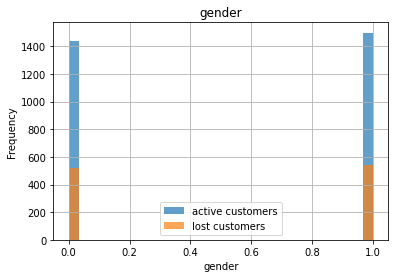

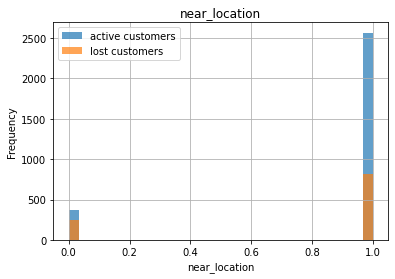

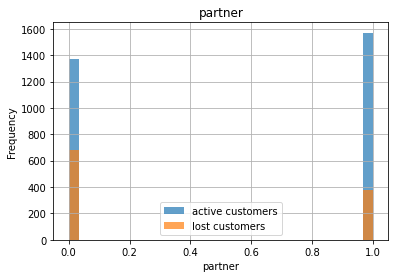

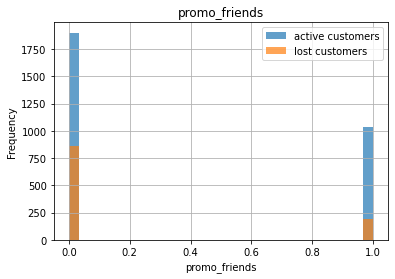

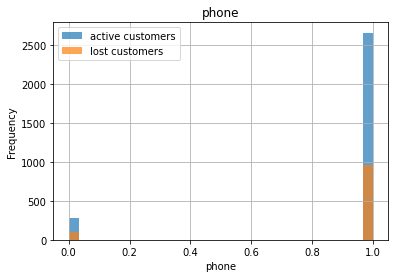

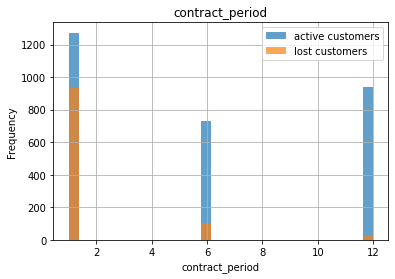

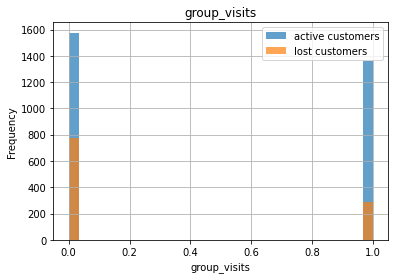

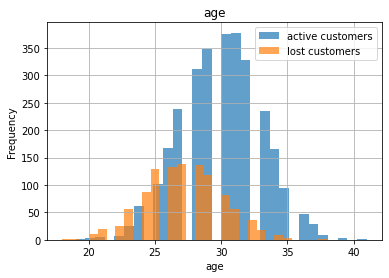

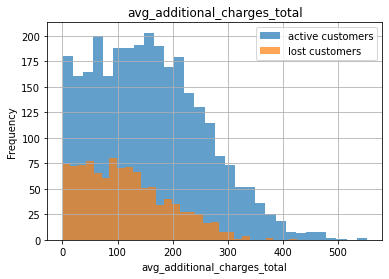

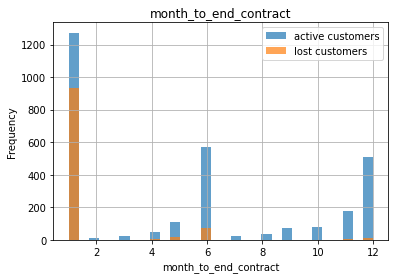

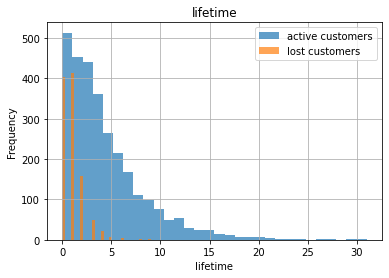

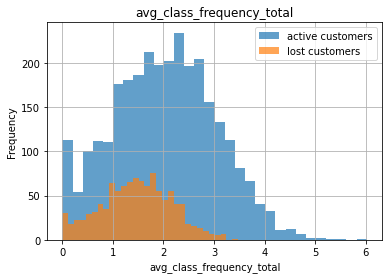

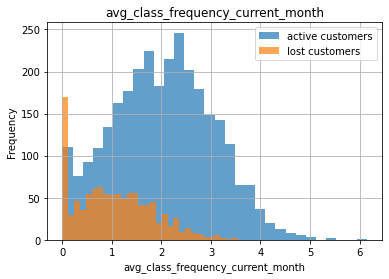

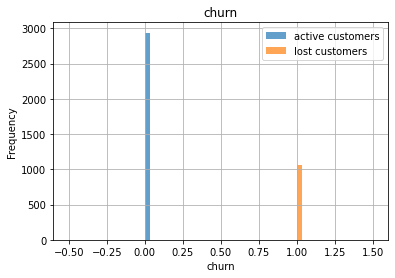

In [11]:
 for name in df.columns:
    show_hist(name)

Let's make more histograms on uncombined charts

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


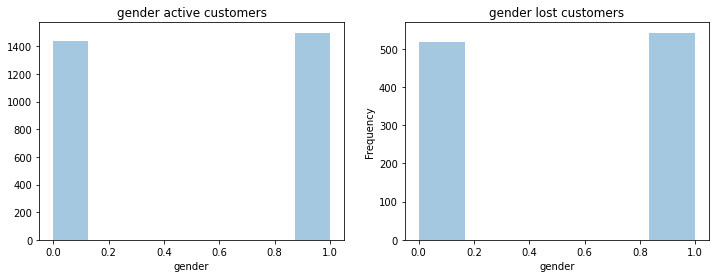

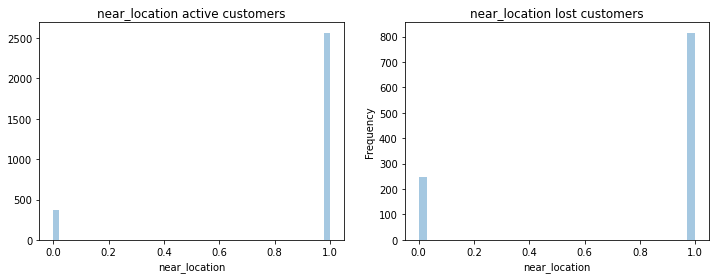

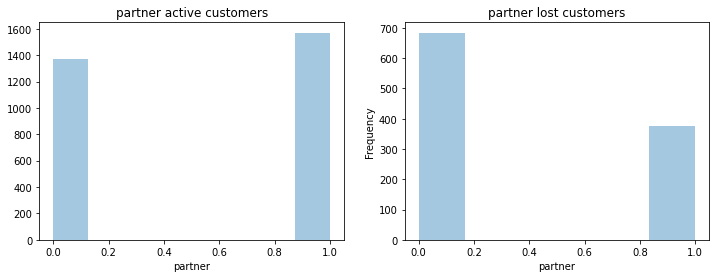

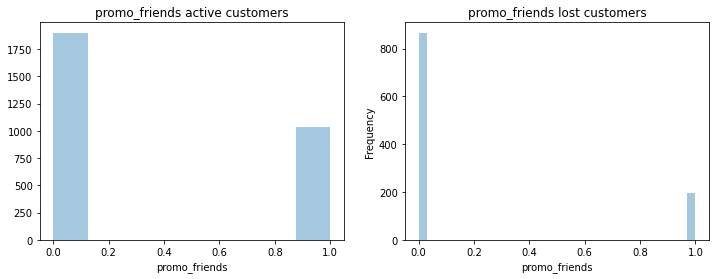

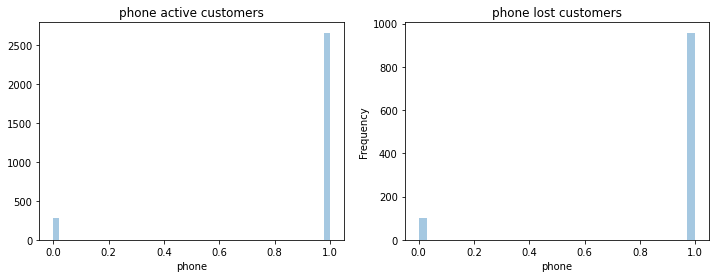

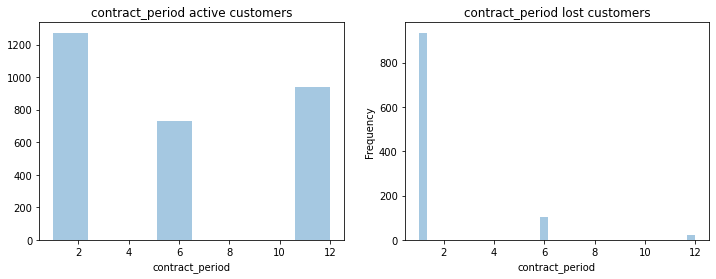

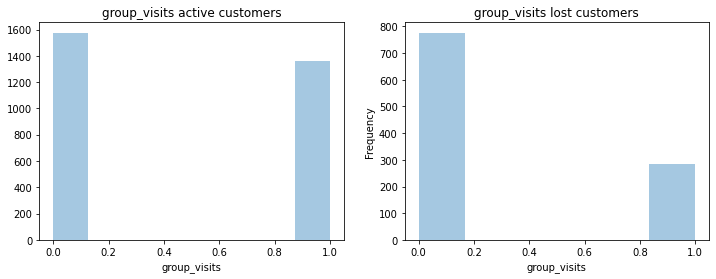

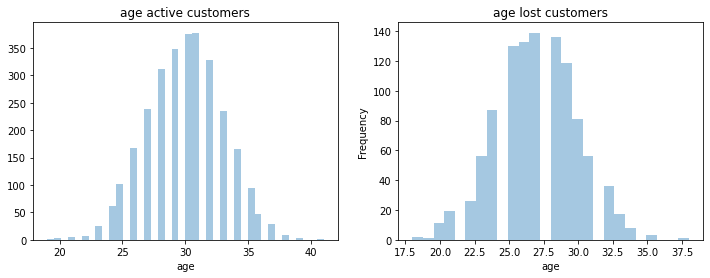

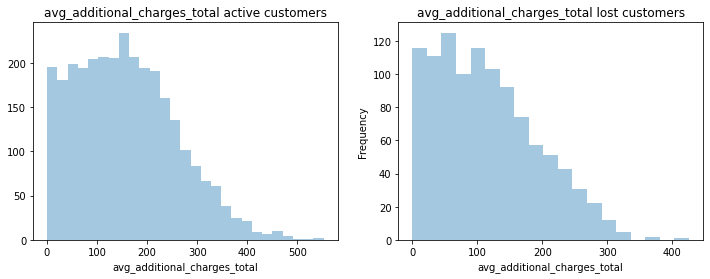

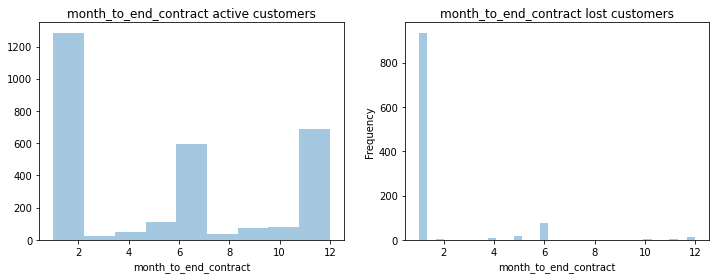

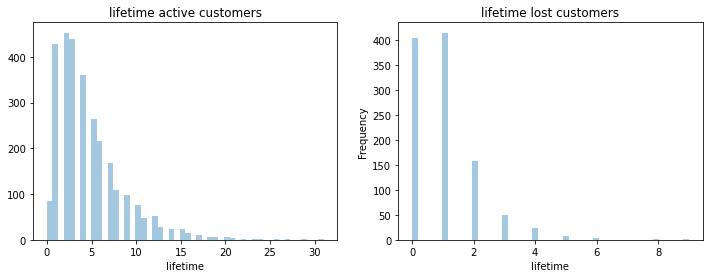

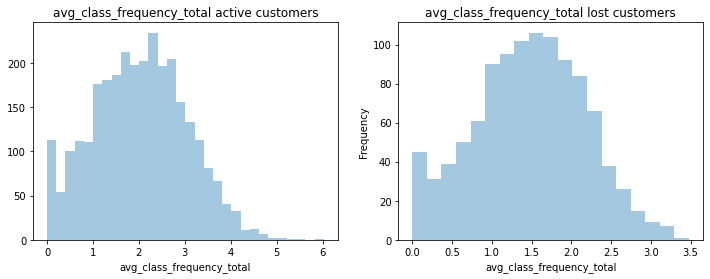

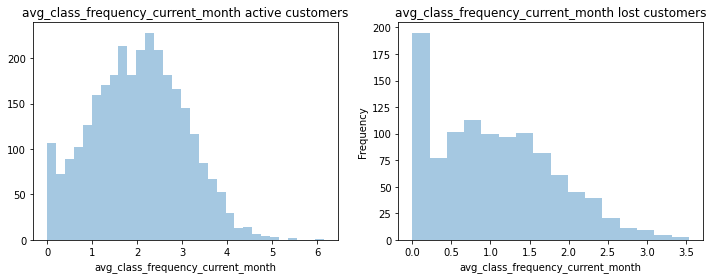

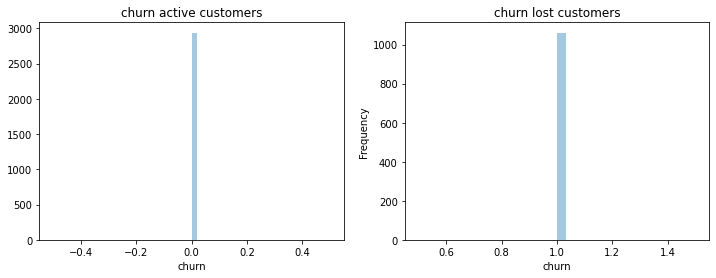

In [12]:
for i in range(14):
    column = df.columns[i]
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.distplot(df[df['churn']==0][column],kde=False, ax=axs[0]).set_title(column + ' active customers')
    sns.distplot(df[df['churn']==1][column],kde=False, ax=axs[1]).set_title(column + ' lost customers')
    plt.xlabel(column)
    plt.ylabel('Frequency')


<b>Results:</b>(for features that have more than two values)
- contract_period - monthly contracts prevail in the churn group. The active customer group also has more monthly contracts, but the difference between 1-month and 6 and 12-months is much smaller.
- month_to_end_contract - the distribution is not clear, the reasons for peaks at 1.6 and 12 months are unclear. There are more customers with a short period till the end of the contract in the losr customers group, which is apparently due to the large number of monthly contracts in this group.
- age - seemingly a perfect normal distribution in both groups. In the group of active customers the age is slightly higher.
- avg_additional_charges_total - the distributions in both groups are similar. In the active customers group expenses are a little higher.
- lifetime - similar distributions. Active customers have a longer lifetime on average.
- avg_class_frequency_total, avg_class_frequency_current_month - the distributions are similar. in the previous month there are more minimum values ​​(0 or close to 0) in the group of those who left.

#### Correlation matrix

In [13]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


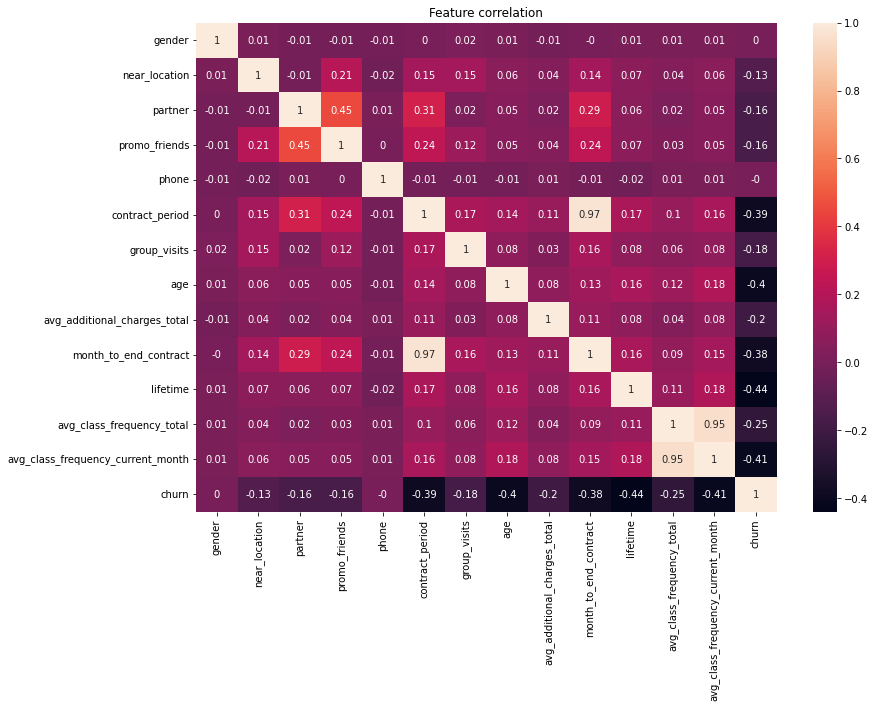

In [14]:
plt.figure(figsize=(13, 9))
plt.title('Feature correlation')
sns.heatmap(df.corr().round(2),  annot=True)
plt.show()

<b>Results:</b>
- two pairs of features (month_to_end_contract and contract_period; avg_class_frequency_total and avg_class_frequency_current_month) show a very high correlation. (We will probably leave only avg_class_frequency_current_month and contract_period because they have a stronger correlation with churn for ML)
- churn has moderate negative correlation with contract_period, month_to_end_contract, age, lifetime, avg_class_frequency_current_month

- There is also a moderate correlation of promo_friends and partners

- Other connections are weak

### Stage 3. Churn prediction model

Let's build a binary classification model, where the target feature is the fact of the outflow of the client in the next month

#### Breakdown of data into training and validation sets.

Т.к. у нас присутствует мультиколлинеарность, убирем один из пары коррелирующих признаков

As we have multicollinearity, we will remove one of the features in each pair

In [15]:
df.drop(['avg_class_frequency_total','month_to_end_contract'], axis = 1, inplace = True)
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0


Let's split our data into features (matrix X) and a target variable (y)

In [16]:
X =  df.drop('churn',axis=1)
y = df['churn']

Creating training and validation sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We will create an object of the StandardScaler class and apply it to the training sample

In [18]:
scaler = StandardScaler()

Let's train scaler and transform the matrix for the training sample

In [19]:
X_train_st = scaler.fit_transform(X_train)
X_train_st[:3]

array([[-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         1.60502986, -0.84769226,  0.57944798,  0.37161711,  1.12734972,
         1.61822807],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125,  0.31628211,
        -0.81299073, -0.84769226,  0.27046055, -1.09697378,  5.88138322,
        -0.01340886],
       [ 0.98511083,  0.4175068 ,  1.03175391, -0.67567125,  0.31628211,
         1.60502986, -0.84769226, -0.65650171, -1.18374157,  0.3350108 ,
        -0.80541199]])

Let's apply standardization to the feature matrix for the test sample

In [20]:
X_test_st = scaler.transform(X_test)
X_test_st[:3]

array([[-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         1.60502986,  1.17967339, -0.03852687,  1.165334  , -0.45732812,
         0.52923355],
       [-1.01511421, -2.39517058, -0.96922337, -0.67567125,  0.31628211,
        -0.81299073,  1.17967339, -0.65650171, -1.01953791, -0.98555406,
        -0.98091361],
       [-1.01511421, -2.39517058,  1.03175391, -0.67567125,  0.31628211,
         0.28610954, -0.84769226,  0.27046055, -1.26091493, -0.45732812,
        -1.6705354 ]])

#### Training the model in two ways: logistic regression and random forest.

Let's define an algorithm for our model

In [21]:
model = LogisticRegression(solver='liblinear', random_state=0) 

Training the model

In [22]:
 model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

Let's calculate the forecast

In [23]:
y_pred_lr = model.predict(X_test)

RandomForestClassifier

In [24]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred_rfc = model.predict(X_test)

#### Let's evaluate the accuracy, precision and recall metrics for both models on the validation set. Let's compare models.

Logistic regression

In [25]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_lr)))
print('Precision: {:.2f}'.format(precision_score (y_test, y_pred_lr)))
print('Recall: {:.2f}'.format(recall_score (y_test, y_pred_lr)))

Accuracy: 0.90
Precision: 0.79
Recall: 0.79


Random Forest

In [26]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rfc)))
print('Precision: {:.2f}'.format(precision_score (y_test, y_pred_rfc)))
print('Recall: {:.2f}'.format(recall_score (y_test, y_pred_rfc)))

Accuracy: 0.90
Precision: 0.81
Recall: 0.75


<b>Results:</b>
Accuracy is the same (90%). Precision is higher for Random forest (81% vs 79%). Recall is higher for logistic regression (79% vs 75%).
<br>
As Accuracy works better if the classes are balanced, but we have a churn rate equal to 27%, we need to focus on other metrics. Precision shows the proportion of correct answers only among the target class. Recall shows how many real objects of class "1" you were able to detect using the model.
<br>
For the task of identifying clients who will leave, we select recall as a target metric - it is better to overestimate the risk of a client leaving and take measures to retain it. On the other hand, if retention costs are limited, you can focus on precision - i.e. spend resources on customers who will definitely leave.

### Stage 4. Clustering

#### Standardizing data

In [27]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#### Let's build a distance matrix using the linkage() function on a standardized feature matrix

In [28]:
linked = linkage(X_sc, method = 'ward')

#### Let's draw a dendrogram

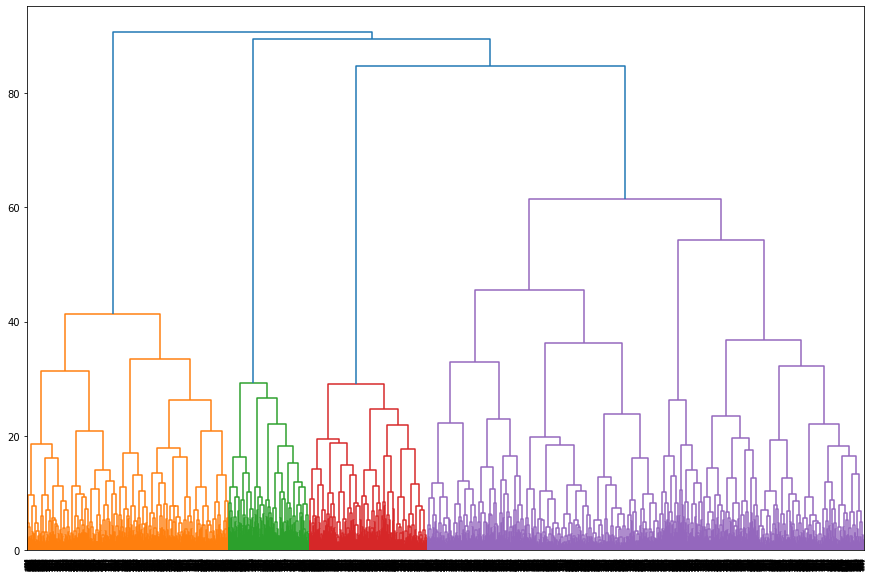

In [29]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

#### Based on the graph, let's assume how many clusters we can choose.

Let's choose 5

#### Let's train a clustering model based on the K-Means algorithm and predict client clusters (we use n=5 as the number of clusters).

In [30]:
km = KMeans(n_clusters = 5, random_state=0)

We will apply the algorithm to the data and form a vector of clusters

In [31]:
labels = km.fit_predict(X_sc)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We will save the cluster labels in our dataset

In [32]:
df['cluster_km'] = labels
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0,0


#### Let's look at the average values of features for clusters

In [33]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


In [34]:
df['cluster_km'].value_counts().sort_index()

0     985
1     558
2    1064
3    1007
4     386
Name: cluster_km, dtype: int64

<b>Results:</b>
Since we are interested in churn rate, let's look at churn: the minimum churn is in cluster 3, the maximum churn is in cluster 2.
<br>

It turns out that in clusters with a low churn rate (3 and 0) there are our target customers (target in terms of attracting new customers). They have high values in features: avg_class_frequency_current_month, lifetime, avg_additional_charges_total, age, group_visits. Therefore, clients who live or work nearby, employees of the partner companies, clients who came on the recommendation stay with us.
<br>

Clusters 1 and 2 with a high churn are also interesting, they have shorter contracts on average, they live not nearby, they spend less on additional services, they have a shorter lifetime and attend the club less frequently.

#### Let's build feature distributions by cluster

In [35]:
def show_hist_km(column_name):
    plt.figure(figsize=(12, 6))
    plt.title(column_name)
    plt.grid(True)
    plt.hist(df[df['cluster_km']==0][column_name], label = '0', bins=30, alpha=0.7)
    plt.hist(df[df['cluster_km']==1][column_name], label = '1', bins=30, alpha=0.7)
    plt.hist(df[df['cluster_km']==2][column_name], label = '2', bins=30, alpha=0.7)
    plt.hist(df[df['cluster_km']==3][column_name], label = '3', bins=30, alpha=0.7)
    plt.hist(df[df['cluster_km']==4][column_name], label = '4', bins=30, alpha=0.7)
    plt.legend()
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.show()

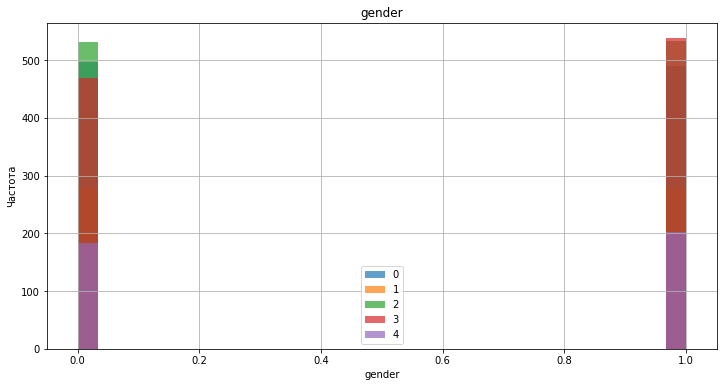

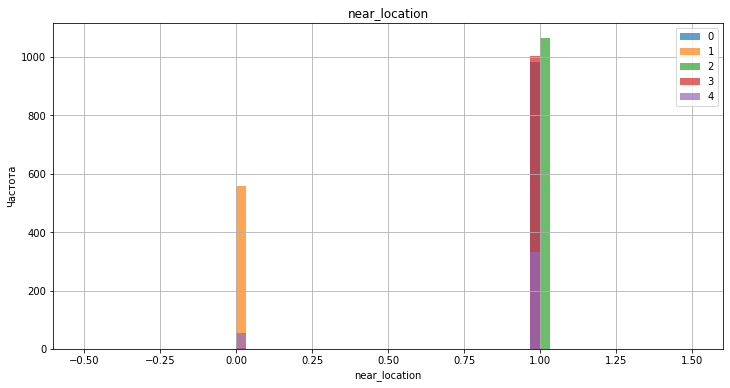

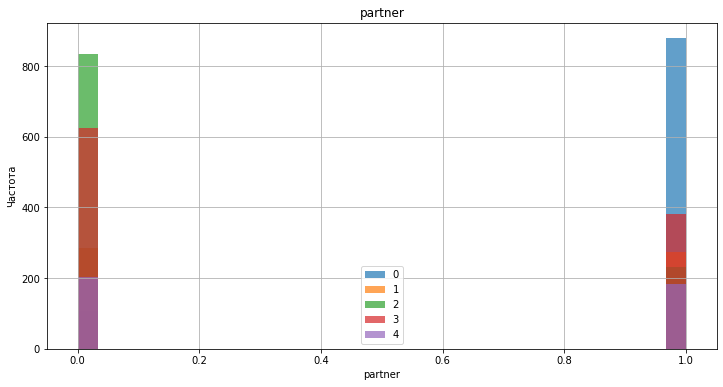

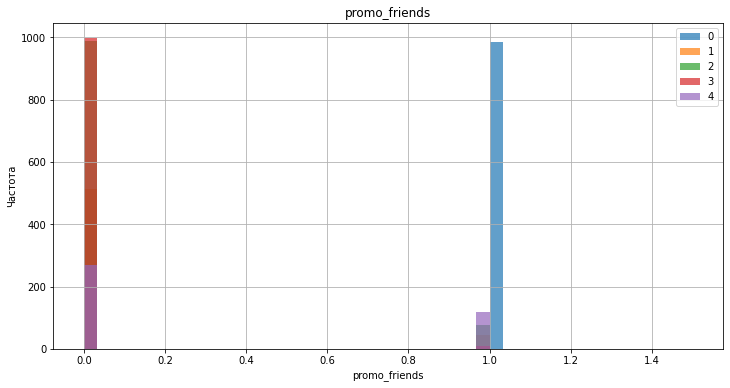

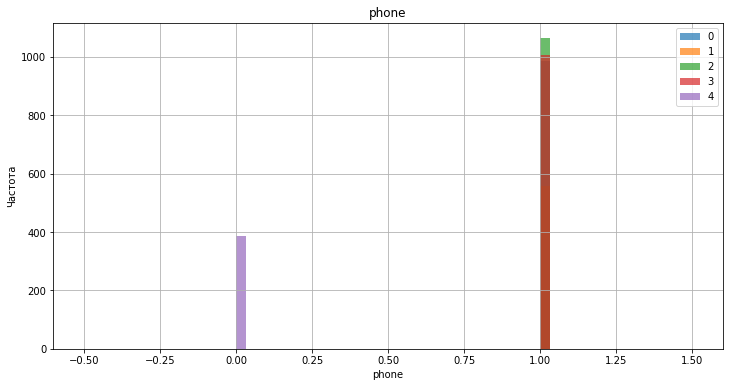

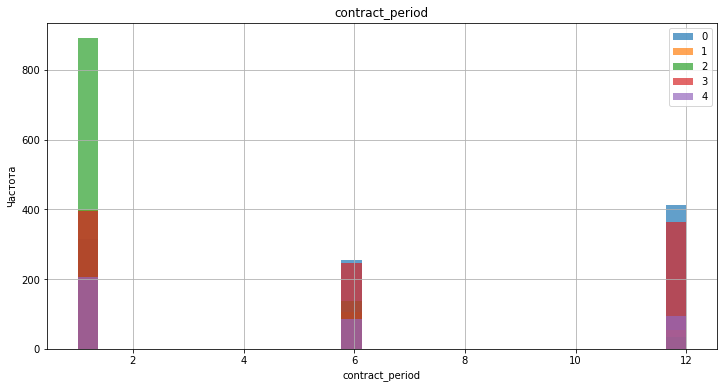

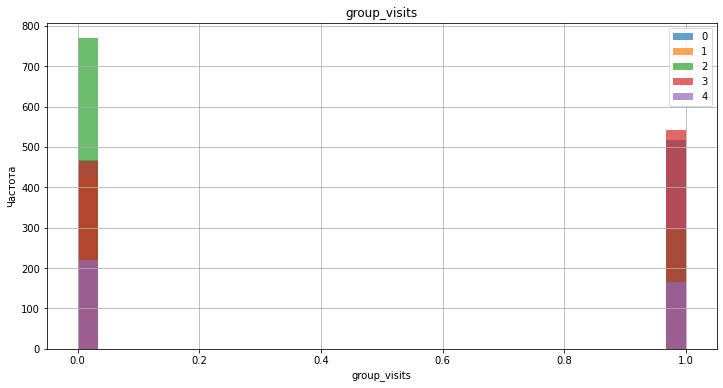

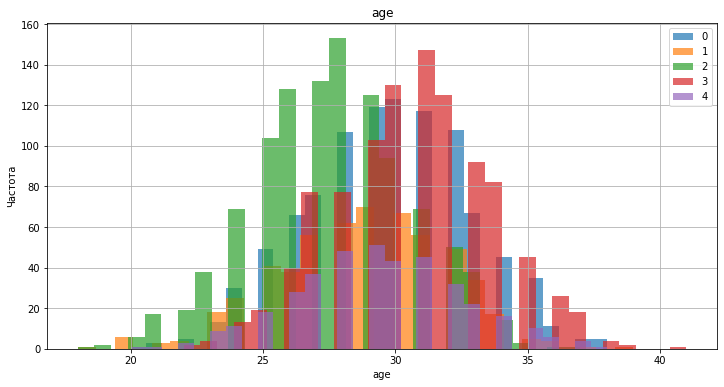

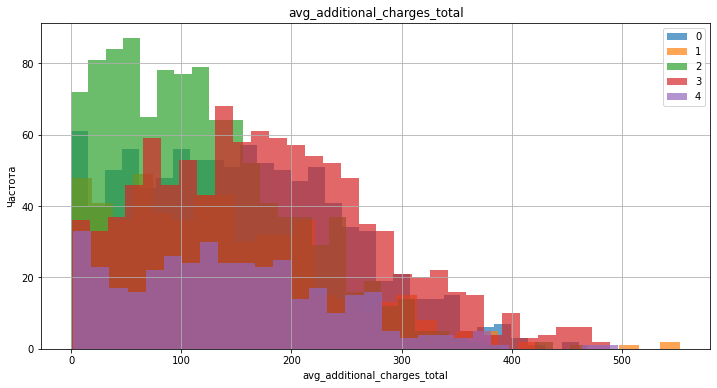

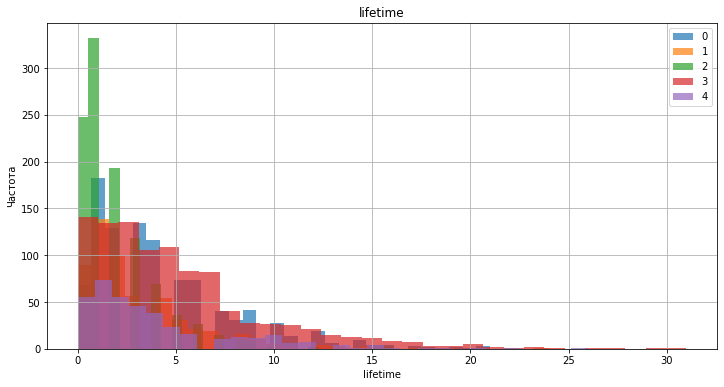

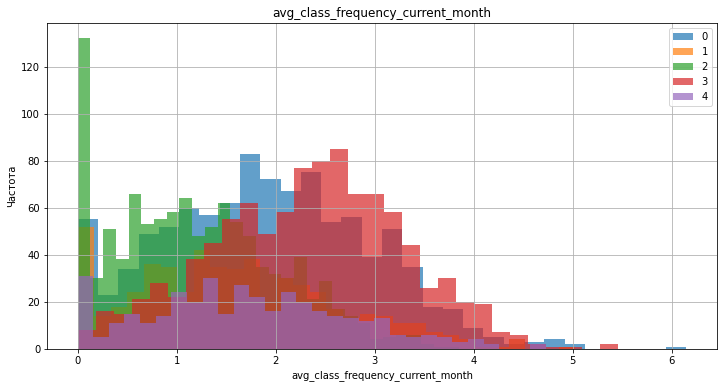

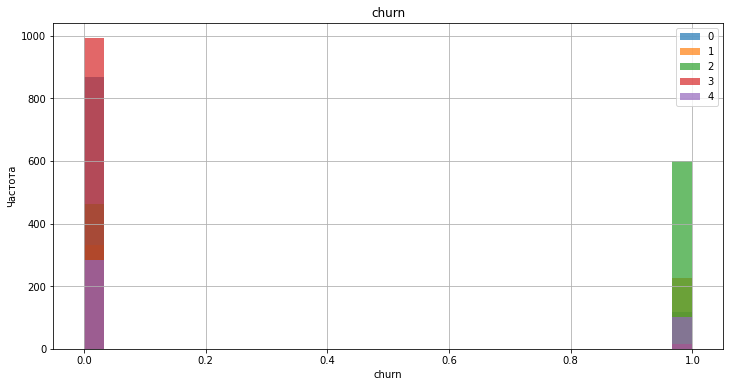

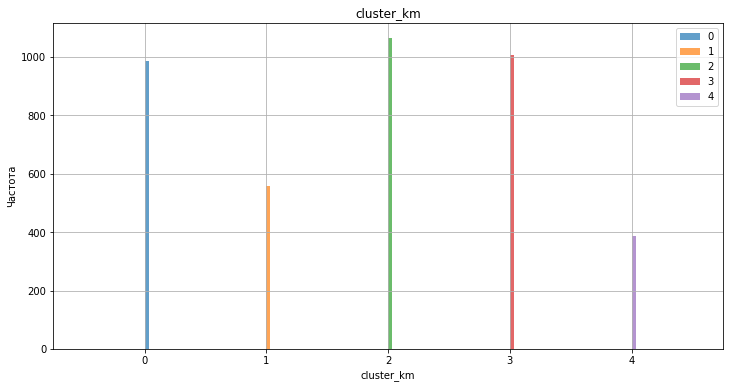

In [36]:
for name in df.columns:
    show_hist_km(name)

Let's build boxplots

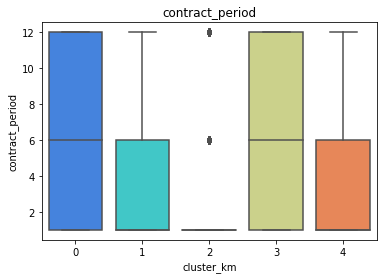

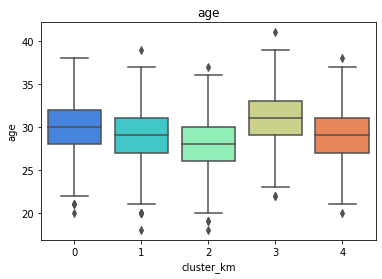

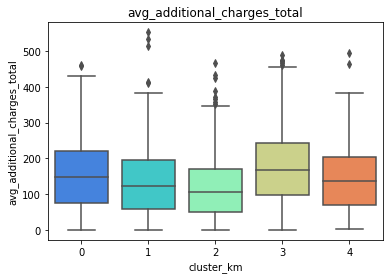

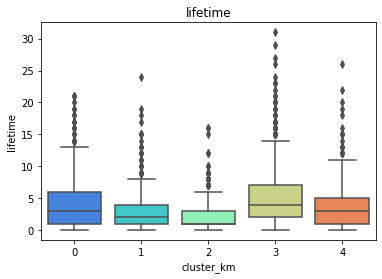

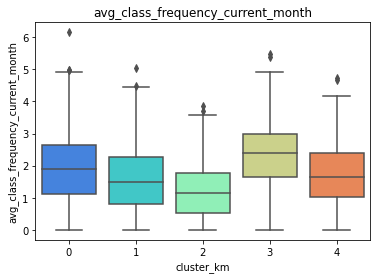

In [37]:
for name in ['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']:
    plt.title(name)
    sns.boxplot(x='cluster_km', y=name, data=df, palette='rainbow')
    plt.show()

<b>Results:</b>
The contract period in clusters with low churn is longer. The difference in age is not significant. Clients from clusters with low churn spend more, they also go to the gym more often and have a longer lifetime

#### Churn rate by cluster

In [38]:
df.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.119797
1    0.403226
2    0.563910
3    0.014896
4    0.266839
Name: churn, dtype: float64

<b>Conclusion:</b>

Clusters with low churn rates (3 and 0) consist of our target customers (in terms of new customers acquisition). They have high values ​​for features: avg_class_frequency_current_month, lifetime, avg_additional_charges_total, age, group_visits. Clients who live or work nearby, employees of the partner companies, customers who came on the recommendation stay with us.
<br>

Clusters 1 and 2 with a high churn are also interesting, they have shorter contracts on average, they live not nearby, they spend less on additional services, they have a shorter lifetime and attend fitness less frequently. We need to pay attention to them if we want to reduce the churn.

### Conclusion and recommendations

1. To predict the probability of churn in the next month we will use logistic regression. Its recall is higher than that of random forest, and it is important for us to identify as many clients as possible who are ready to leave;

2. A typical client profile: age 29 +/- 3 years, 85% likely to live or work nearby, 49% likely to be an employee of a partner company, 31% came from a friend's recommendation, 41% attends group classes. Typical contract period 1 month median, average cost of additional services 147 +/- 96. Typical lifetime: 3 months median.

3. Based on the results of clustering, several groups have been identified that should be paid attention to:
     - target customers (in terms of attracting new customers) with a low churn rate: customers with a combination of characteristics: they came on the recommendation (promo_friends), employees of the partner company (partner), live or work nearby (near_location), enter into contracts for a relatively long term. From them you can expect frequent visits to the gym, a typical lifetime is 4-5 months (although this is still not enough), the use of other fitness services. (there is no point in segmenting by age, since the differences between clusters are small).
     - current clients that you need to pay attention to due to the high risk of churn: they live far away, came without a promotion from a friend, contracts are short-lived (on average 3 months), do not attend group classes and use additional services a little.
     
<br>
4. Recommendations for improving the quality of work with clients:
- attract new customers based on the description of the target customer (above)
- for customers with a high risk of churn (the segment described above), develop retention measures. For example, contract renewal at a discount, longer contracts at a reduced cost, bonuses.